In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
HOURS_STR = "00 01 02 04 08 18".split()
HOURS = [0, 1, 2, 4, 8, 18]
COLORS = "red gold limegreen turquoise blue magenta".split()

P_VALUE_BOUNDARY = 0.05

In [3]:
df_raw = pd.read_csv("../GSE141834_scRNAseq_rawCounts.txt", sep="\t")
df_raw

,Dex.00.2_AGGTTATCGCCTATATAC,Dex.00.2_CTATTACTATTAGTCCTA,Dex.00.2_CAAGTCATCCGGGGACGA,Dex.00.2_ACCTTCTAATAGTGCTAA,Dex.00.2_TCGCCTAAAGAACATAGA,Dex.00.2_GAGGCCACAAGGACAAGG,Dex.00.2_GGATTGCTGTGGGCTTGT,Dex.00.2_CGTTATCTGTGGCTGTGG,Dex.00.2_TCGGGAAGTAAACAAGTC,Dex.00.2_GTACAGGGTAGGGAGGCC,...,Dex.18.2_GCTCCCACGGACTAGAGG,Dex.18.2_TGGCAGAAAGAATACCGA,Dex.18.2_TTAAGATCGGGAGTCGGC,Dex.18.2_CCGATGAGATGTTGAATT,Dex.18.2_TCGCCTTCTAGCCGAAAG,Dex.18.2_TGCGGTAGGTTAACGGAC,Dex.18.2_TGAGACCTGTGGTCATCA,Dex.18.2_TAGAGGGGCCATAGGTTA,Dex.18.2_TCGGGACACCACCAGGAG,Dex.18.2_CTATTAGCCGTTGTCGGC
CTSH,0,0,1,0,2,0,1,0,0,0,...,0,0,0,3,0,1,0,1,0,1
SFXN4,1,0,0,1,1,1,0,0,1,2,...,1,0,0,1,0,0,2,2,1,3
AC127537.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCAF8L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RBM45,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RNA5SP342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC073593.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC013437.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MAP6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_raw.index = df_raw.index.str.replace("-", "_").str.replace(" ", "_").str.upper()

In [5]:
df_sc = pd.read_csv("../GSE141834_scRNAseq_seuratV3_normalized.txt", sep="\t")
df_sc

,Dex.00.2_AGGTTATCGCCTATATAC,Dex.00.2_CTATTACTATTAGTCCTA,Dex.00.2_CAAGTCATCCGGGGACGA,Dex.00.2_ACCTTCTAATAGTGCTAA,Dex.00.2_TCGCCTAAAGAACATAGA,Dex.00.2_GAGGCCACAAGGACAAGG,Dex.00.2_GGATTGCTGTGGGCTTGT,Dex.00.2_CGTTATCTGTGGCTGTGG,Dex.00.2_TCGGGAAGTAAACAAGTC,Dex.00.2_GTACAGGGTAGGGAGGCC,...,Dex.18.2_GCTCCCACGGACTAGAGG,Dex.18.2_TGGCAGAAAGAATACCGA,Dex.18.2_TTAAGATCGGGAGTCGGC,Dex.18.2_CCGATGAGATGTTGAATT,Dex.18.2_TCGCCTTCTAGCCGAAAG,Dex.18.2_TGCGGTAGGTTAACGGAC,Dex.18.2_TGAGACCTGTGGTCATCA,Dex.18.2_TAGAGGGGCCATAGGTTA,Dex.18.2_TCGGGACACCACCAGGAG,Dex.18.2_CTATTAGCCGTTGTCGGC
CTSH,0.000000,0.0,0.654695,0.000000,0.577710,0.000000,0.328845,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.514849,0.0,0.163407,0.000000,0.194473,0.000000,0.228521
SFXN4,0.376034,0.0,0.000000,0.378786,0.330006,0.465099,0.000000,0.0,0.494122,0.56343,...,0.295349,0.0,0.0,0.202501,0.0,0.000000,0.325449,0.357214,0.381507,0.571103
AC127537.3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
DCAF8L1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
RBM45,0.000000,0.0,0.654695,0.000000,0.330006,0.465099,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.202501,0.0,0.303825,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RNA5SP342,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AC073593.1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AC013437.1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
MAP6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df_sc.index = df_sc.index.str.replace("-", "_").str.replace(" ", "_").str.upper()

In [7]:
df_bulk = pd.read_csv("../GSE141834_bulkRNAseq_normalized_counts.txt", sep="\t")
df_bulk

,EtOH_rep1,EtOH_rep2,EtOH_rep3,D1hr_rep1,D1hr_rep2,D1hr_rep3,D2hr_rep1,D2hr_rep2,D2hr_rep3,D4hr_rep1,D4hr_rep2,D4hr_rep3,D8hr_rep1,D8hr_rep2,D8hr_rep3,D18hr_rep1,D18hr_rep2,D18hr_rep3
5S_rRNA,3.973446,3.612759,1.925661,1.471233,3.202529,3.130089,4.518892,2.747246,0.000000,3.086150,2.790752,4.085496,0.000000,2.037837,2.259326,1.998628,3.332950,2.993709
7SK,1.472412,2.479933,2.619279,1.167265,1.649555,1.172575,4.808529,1.023220,3.366017,1.492124,1.816693,2.479775,3.083155,2.419559,2.379228,1.732823,0.445557,2.354582
A1BG,10.369209,10.326135,10.328594,10.195488,10.161239,10.188419,10.593778,10.272442,10.349048,9.976076,10.005323,10.148000,10.099890,9.830985,10.017573,9.809171,9.969770,9.957757
A1BG-AS1,10.266870,10.067127,10.252650,10.142306,10.087848,10.060288,10.346227,10.096515,9.933078,9.922729,9.863700,9.938663,9.986381,10.185118,10.187539,10.218006,10.044732,10.134280
A1CF,0.000000,0.000000,0.000000,0.000000,0.076224,0.000000,0.000000,0.000000,0.000000,0.000000,0.207719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ5,1.219611,1.538627,0.000000,0.934211,0.000000,0.000000,0.000000,0.771657,0.000000,0.000000,0.753118,0.000000,0.000000,0.976431,0.000000,0.000000,0.000000,0.000000
snoZ6,1.166560,0.000000,0.000000,0.000000,0.769903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snosnR60_Z15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snosnR66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_bulk.index = df_bulk.index.str.replace("-", "_").str.replace(" ", "_").str.upper()

In [9]:
df_bulk['total_expression'] = df_bulk.sum(axis=1)

In [10]:
merged = pd.merge(df_sc, df_bulk[df_bulk["total_expression"] > 0], how='inner', left_index=True, right_index=True).sort_values(by='total_expression', ascending=False)

In [11]:
merged

,Dex.00.2_AGGTTATCGCCTATATAC,Dex.00.2_CTATTACTATTAGTCCTA,Dex.00.2_CAAGTCATCCGGGGACGA,Dex.00.2_ACCTTCTAATAGTGCTAA,Dex.00.2_TCGCCTAAAGAACATAGA,Dex.00.2_GAGGCCACAAGGACAAGG,Dex.00.2_GGATTGCTGTGGGCTTGT,Dex.00.2_CGTTATCTGTGGCTGTGG,Dex.00.2_TCGGGAAGTAAACAAGTC,Dex.00.2_GTACAGGGTAGGGAGGCC,...,D4hr_rep1,D4hr_rep2,D4hr_rep3,D8hr_rep1,D8hr_rep2,D8hr_rep3,D18hr_rep1,D18hr_rep2,D18hr_rep3,total_expression
RN7SL2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.000501,22.903907,22.928137,23.029549,22.994065,23.058910,22.951587,23.091028,23.082414,413.515696
RN7SK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.232604,22.173265,22.185951,22.278076,22.378011,22.364732,22.390943,22.373367,22.140546,400.542676
RMRP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.982379,21.019146,21.059962,20.954586,21.108466,21.127400,21.051465,21.188762,21.061567,378.773814
KRT8,3.672386,4.216843,4.486756,3.633390,3.729578,4.078093,4.241727,4.137856,3.863911,3.915710,...,20.307063,20.290994,20.454851,20.535291,20.649658,20.595916,21.113158,21.044613,21.032342,369.124100
EEF1A1,0.862674,1.836604,0.654695,0.652858,0.776076,1.214523,1.080724,1.048962,0.823350,1.294290,...,20.226616,20.268897,20.156145,20.301973,20.235071,20.224635,20.232676,20.238302,20.199646,363.705810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC092573.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125849
RPL7AP30,0.000000,0.630845,0.654695,0.000000,0.776076,0.465099,0.000000,0.656142,0.000000,0.320882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125844
AJAP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125818
ANP32D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125808


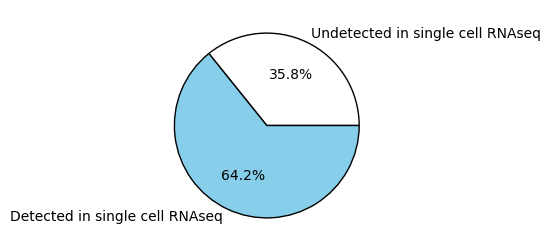

In [12]:
bulk_expressed = len(df_bulk[df_bulk["total_expression"] > 0])
merge_expressed = len(merged[merged["total_expression"] > 0])

compen = bulk_expressed - merge_expressed
ratio = [compen, bulk_expressed]
labels = ["Undetected in single cell RNAseq", "Detected in single cell RNAseq"]
plt.figure(figsize=(3, 3))
plt.pie(ratio, labels=labels, colors=["white", "skyblue"], wedgeprops = {'edgecolor': 'black'}, autopct='%0.1f%%')
plt.show()


In [13]:
geneCounts = len(merged)
divider = geneCounts / 5
mergedQuintiles = [merged.iloc[int(divider * i): int(divider * (i + 1))] for i in range(5)]

In [14]:
values = [(q.loc[:, q.columns.str.startswith('Dex.')] > 0).sum(axis=0).values/len(q)*100 for q in mergedQuintiles]

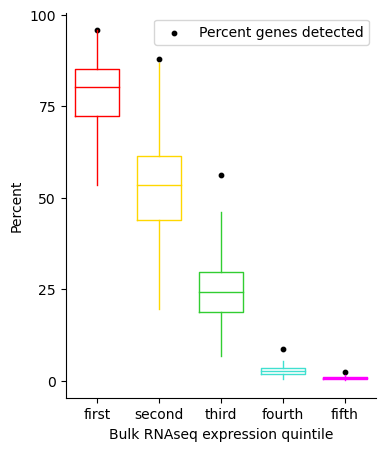

In [15]:
plt.figure(figsize=(4, 5))
for i, (value, color) in enumerate(zip(values, COLORS[:4] + COLORS[-1:])):
    plt.boxplot(value, positions=[i], widths=0.7, showcaps=False, showfliers=False, boxprops={"color": color}, medianprops={"color": color}, whiskerprops={"color": color})
plt.scatter(range(5), [np.max(v) for v in values], color='black', s=10, label="Percent genes detected")
plt.xticks(range(5), "first second third fourth fifth".split())
plt.yticks(np.linspace(0, 100, 5))
plt.xlabel("Bulk RNAseq expression quintile")
plt.ylabel("Percent")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper right')
plt.show()

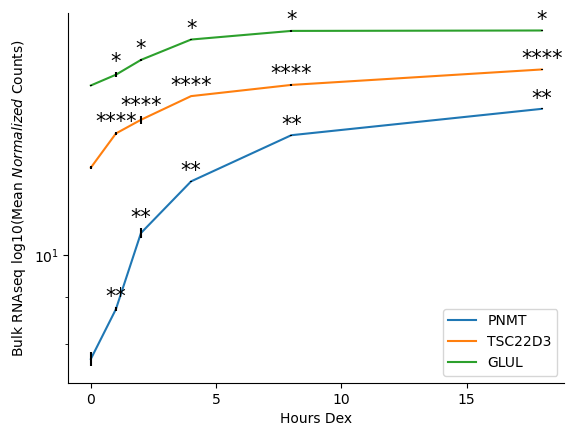

In [16]:
toSee = "PNMT TSC22D3 GLUL".split()

for gene in toSee:
    dat = df_bulk.loc[gene].values[:-1].reshape(-1, 3)
    avg = np.mean(dat, axis=1)
    std = np.std(dat, axis=1)
    plt.plot(HOURS, avg, label=gene)
    plt.errorbar(HOURS, avg, fmt='none', yerr=std, color='black')
    for i, (x, y) in enumerate(zip(HOURS, avg+std)):
        if x == 0:
            continue
        logp = int(np.ceil(np.log10(P_VALUE_BOUNDARY / ttest_ind(dat[0], dat[1])[1])))
        plt.text(x, y, "*"*logp, fontsize=15, ha='center', va='bottom')
plt.yscale('log')
plt.xticks(np.linspace(0, 15 , 4))
plt.ylabel("Bulk RNAseq log10(Mean $Normalized$ Counts)")
plt.xlabel("Hours Dex")
plt.legend(loc='lower right')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

/blaze/hanju/conda/envs/dex_reproducing/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


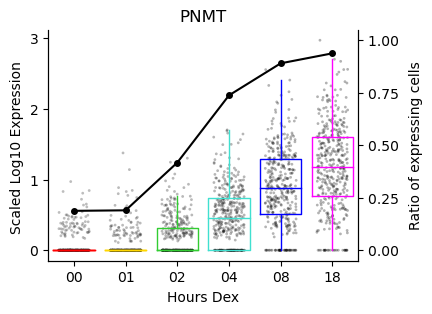

/blaze/hanju/conda/envs/dex_reproducing/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


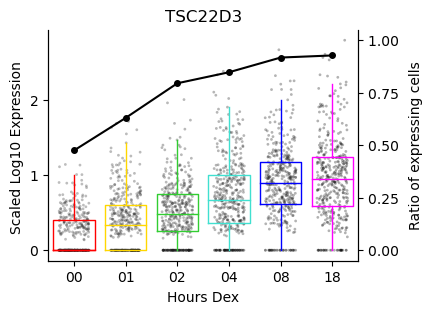

/blaze/hanju/conda/envs/dex_reproducing/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


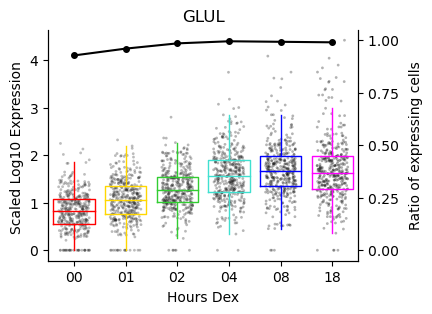

In [17]:
from matplotlib.ticker import MaxNLocator

for gene in toSee:
    plt.figure(figsize=(4, 3))
    plt.title(gene)
    groups = []
    for i, (hours, color) in enumerate(zip(HOURS_STR, COLORS)):
        groups.append(merged.loc[gene, merged.columns.str.startswith(f"Dex.{hours}")].values)
        plt.boxplot(groups[i], positions=[i], widths=0.8, showfliers=False, showcaps=False, boxprops={"color": color}, medianprops={"color": color}, whiskerprops={"color": color})
    sns.stripplot(groups, s=2, color="black", jitter=.3, alpha=.3, zorder=0)
    groups = np.array(groups)
    plt.xticks(range(len(HOURS_STR)), HOURS_STR)
    
    plt.xlabel("Hours Dex")
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.set_ylabel("Scaled Log10 Expression ")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax.twinx()
    ax2.spines['top'].set_visible(False)
    ax2.plot((groups > 0).mean(axis=1), c='black', marker='o', markersize=4)
    ax2.set_yticks(np.linspace(0, 1, 5), ["0.00 ", "0.25 ", "0.50 ", "0.75 ", "1.00 "])
    ax2.set_ylabel("Ratio of expressing cells")
    ax2.set_ylim(-.05, 1.05)
    
    plt.show()